## Importing the dataset

In [1]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('MNIST_784')


In [12]:
X=mnist.data
y=mnist.target
print(X.shape)
print(y.shape)
y.head()

(70000, 784)
(70000,)


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

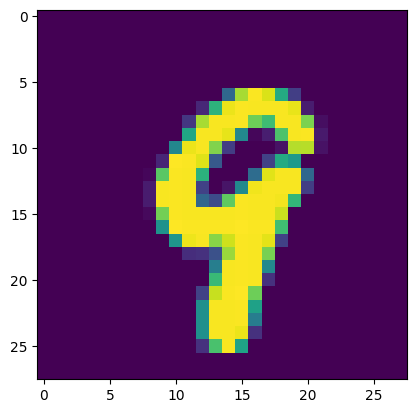

Val should be:  9


In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

rand=X.iloc[6969].to_numpy()
img=rand.reshape(28,28)
plt.imshow(img)
plt.show()
print("Val should be: ",y[6969])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42, stratify=y)
X_train.shape

(60000, 784)

## Training a Binary Classifier

In [60]:
# The binary classifier can only give negative or positive outcomes
y_train_5 = (y_train == '5') # True for all 5s
y_test_5 = (y_test == '5')
y_train_5.value_counts(False)

class
False    54589
True      5411
Name: count, dtype: int64

In [61]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

## Measuring Performance of the Binary Classifier

In [63]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy").mean()

0.9664